### DATASET: [TLC Trip Record Data Yellow Taxi (June 2022)](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-06.parquet)

In [1]:
!pip install pdf2image
!sudo apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (209 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-

In [33]:
# importing necessary libraries and packages
import pandas as pd
import numpy as np
from pdf2image import convert_from_path
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
output_notebook()

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # output format

In [4]:
# read dataset
df = pd.read_parquet("/content/yellow_tripdata_2022-06.parquet")

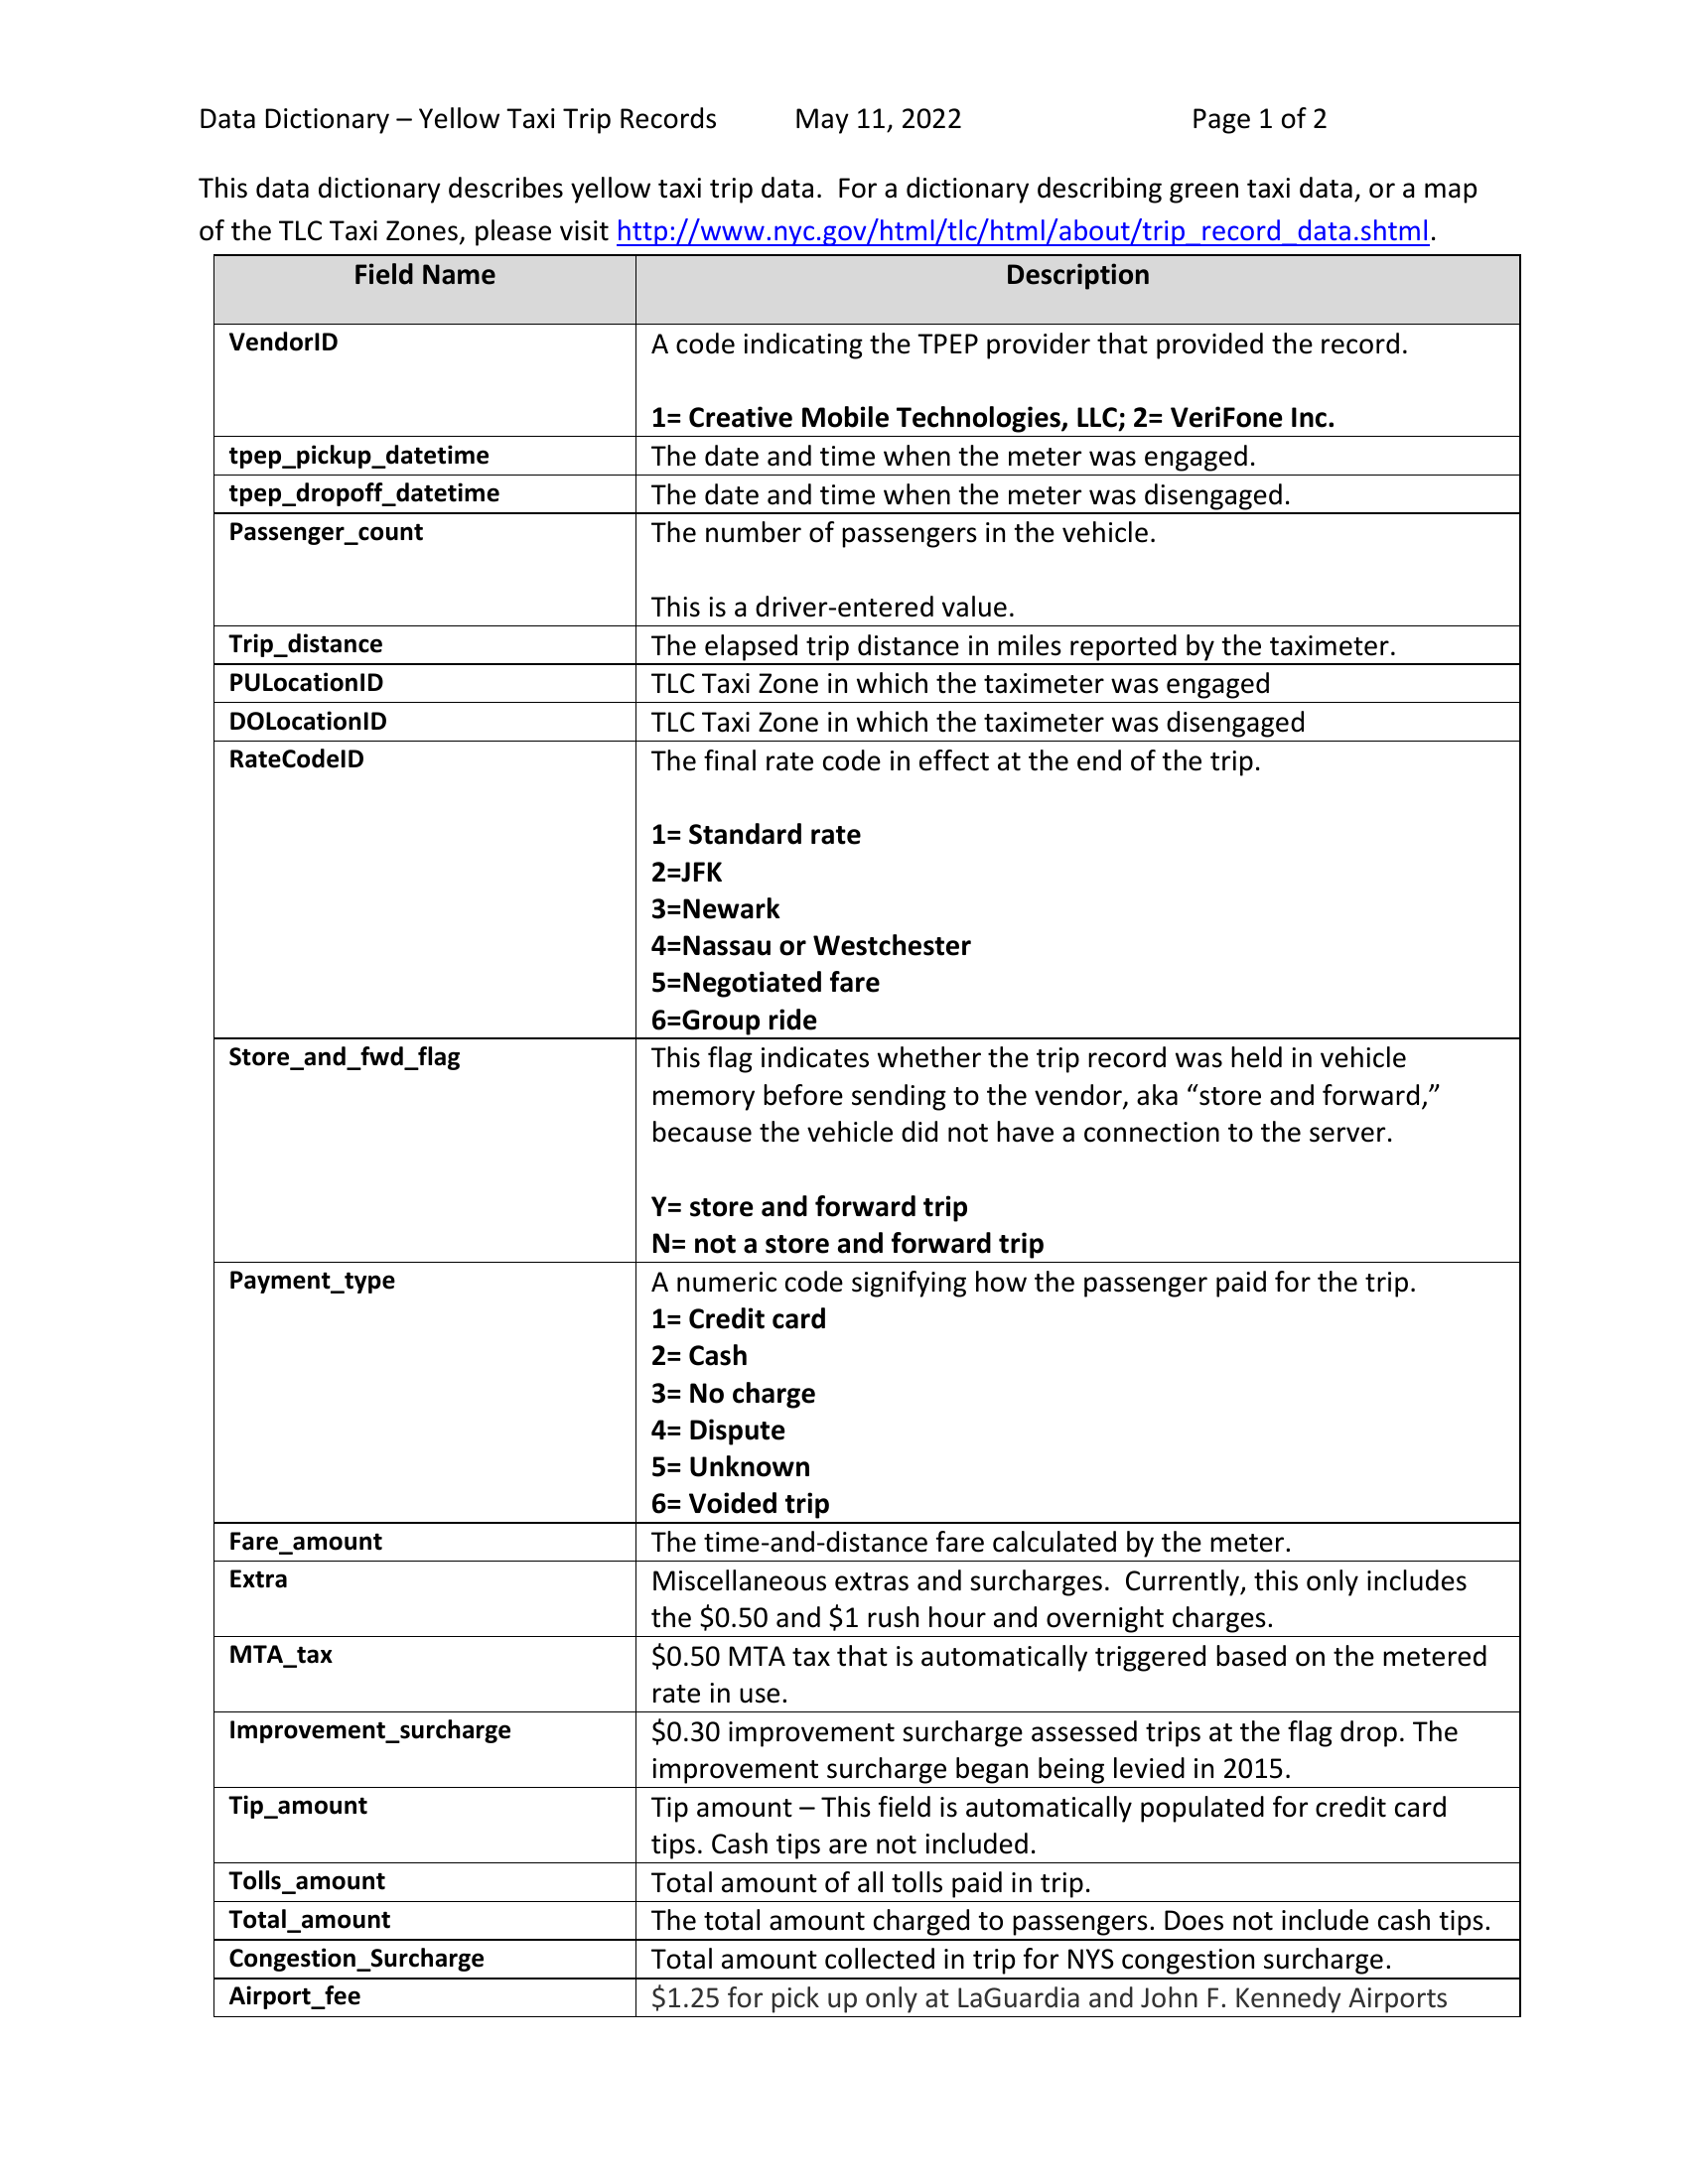

In [5]:
# read data dictionary 
data_dict = convert_from_path("/content/data_dictionary_trip_records_yellow.pdf")
data_dict[0] 

In [6]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-06-01 00:25:41   2022-06-01 00:48:22            1.000   
1         1  2022-06-01 00:44:40   2022-06-01 01:01:48            1.000   
2         2  2022-06-01 00:23:07   2022-06-01 00:39:50            1.000   
3         1  2022-06-01 00:25:53   2022-06-01 00:57:06            2.000   
4         1  2022-06-01 00:23:58   2022-06-01 00:33:43            0.000   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0         11.000       1.000                  N            70            48   
1          4.200       1.000                  N           170           226   
2          9.490       1.000                  N           264           113   
3         12.100       1.000                  N           132            17   
4          1.800       1.000                  N           140           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1       32.000  3.000    0.500       2.000         6.550   
1             1       14.000  3.000    0.500       0.000         0.000   
2             1       26.000  0.500    0.500       5.000         6.550   
3             2       37.000  1.750    0.500       0.000         0.000   
4             1        9.000  3.000    0.500       2.550         0.000   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                  0.300        44.350                 2.500        0.000  
1                  0.300        17.800                 2.500        0.000  
2                  0.300        42.600                 2.500        1.250  
3                  0.300        39.550                 0.000        1.250  
4                  0.300        15.350                 2.500        0.000

In [7]:
df.shape

(3558124, 19)

In [8]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          132448
trip_distance                 0
RatecodeID               132448
store_and_fwd_flag       132448
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     132448
airport_fee              132448
dtype: int64

In [23]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425676 entries, 0 to 3425675
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [9]:
df.describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count 3558124.000      3425676.000    3558124.000 3425676.000   3558124.000   
mean        1.714            1.399          5.968       1.418       164.609   
std         0.488            0.961        594.129       5.703        65.541   
min         1.000            0.000          0.000       1.000         1.000   
25%         1.000            1.000          1.140       1.000       132.000   
50%         2.000            1.000          1.930       1.000       162.000   
75%         2.000            1.000          3.670       1.000       234.000   
max         6.000            9.000     307007.110      99.000       265.000   

       DOLocationID  payment_type  fare_amount       extra     mta_tax  \
count   3558124.000   3558124.000  3558124.000 3558124.000 3558124.000   
mean        162.412         1.182       15.249       1.021       0.488   
std          70.169         0.510      212.184       1.255       0.094   
min           1.000         0.000     -907.000      -7.000      -0.500   
25%         113.000         1.000        7.000       0.000       0.500   
50%         162.000         1.000       10.500       0.500       0.500   
75%         234.000         1.000       17.000       2.500       0.500   
max         265.000         4.000   395844.940       8.250       3.300   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count 3558124.000   3558124.000            3558124.000   3558124.000   
mean        2.796         0.562                  0.296        22.118   
std         3.582         2.121                  0.048       212.462   
min       -80.080       -63.200                 -0.300      -911.550   
25%         1.000         0.000                  0.300        12.350   
50%         2.160         0.000                  0.300        16.180   
75%         3.450         0.000                  0.300        23.340   
max      1400.160       800.090                  0.300    395848.240   

       congestion_surcharge  airport_fee  
count           3425676.000  3425676.000  
mean                  2.282        0.096  
std                   0.749        0.336  
min                  -2.500       -1.250  
25%                   2.500        0.000  
50%                   2.500        0.000  
75%                   2.500        0.000  
max                   2.750        1.250

A peculiar thing to note is that minimum value of passenger count is 0. Let's dive a little deep into this

### Understanding Outliers

In [13]:
temp = df.loc[df['passenger_count'] == 0.000]

In [14]:
temp

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               1  2022-06-01 00:23:58   2022-06-01 00:33:43            0.000   
56              1  2022-06-01 00:11:25   2022-06-01 00:36:24            0.000   
134             1  2022-06-01 00:02:38   2022-06-01 00:12:37            0.000   
135             1  2022-06-01 00:14:14   2022-06-01 00:22:59            0.000   
279             1  2022-06-01 00:13:36   2022-06-01 00:28:13            0.000   
...           ...                  ...                   ...              ...   
3425479         1  2022-06-30 23:31:24   2022-06-30 23:47:08            0.000   
3425564         1  2022-06-30 23:00:51   2022-06-30 23:15:38            0.000   
3425565         1  2022-06-30 23:17:44   2022-06-30 23:28:10            0.000   
3425566         1  2022-06-30 23:36:00   2022-06-30 23:59:31            0.000   
3425583         1  2022-06-30 23:10:49   2022-06-30 23:27:28            0.000   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                1.800       1.000                  N           140   
56              11.300       1.000                  N           138   
134              2.100       1.000                  N           238   
135              1.600       1.000                  N            41   
279              3.500       1.000                  N           264   
...                ...         ...                ...           ...   
3425479          1.700       1.000                  N           233   
3425564          2.100       1.000                  Y           161   
3425565          1.800       1.000                  N            68   
3425566          4.200       1.000                  N           230   
3425583          2.200       1.000                  N           158   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                 163             1        9.000  3.000    0.500       2.550   
56                132             1       33.500  1.750    0.500       7.200   
134                41             1        9.500  3.000    0.500       2.000   
135                75             1        8.000  0.500    0.500       3.000   
279               264             2       13.500  0.500    0.500       0.000   
...               ...           ...          ...    ...      ...         ...   
3425479           246             1       11.000  3.000    0.500       1.000   
3425564            68             1       11.000  3.000    0.500       1.000   
3425565           162             1        9.000  3.000    0.500       2.550   
3425566            74             2       18.000  3.000    0.500       0.000   
3425583            79             1       11.500  3.000    0.500       1.000   

         tolls_amount  improvement_surcharge  total_amount  \
4               0.000                  0.300        15.350   
56              0.000                  0.300        43.250   
134             0.000                  0.300        15.300   
135             0.000                  0.300        12.300   
279             0.000                  0.300        14.800   
...               ...                    ...           ...   
3425479         0.000                  0.300        15.800   
3425564         0.000                  0.300        15.800   
3425565         0.000                  0.300        15.350   
3425566         0.000                  0.300        21.800   
3425583         0.000                  0.300        16.300   

         congestion_surcharge  airport_fee  
4                       2.500        0.000  
56                      0.000        1.250  
134                     2.500        0.000  
135                     0.000        0.000  
279                     0.000        0.000  
...                       ...          ...  
3425479                 2.500        0.000  
3425564                 2.500        0.000  
3425565                 2.500        0.000  
3425566                 2.5

1.93% rides are having passenger count as 0. This might be done by the taxi drivers to complete the no. of minimum rides. 

Let's check if there is some route where this is more common

In [35]:
from bokeh.plotting import figure, output_file, show 
from bokeh.palettes import magma
       
graph = figure(title = "Scatter Plot b/w start and end location") 

graph.xaxis.axis_label = "Pick-up location"
       
graph.yaxis.axis_label = "Drop-off location"

colors = np.array([(r, g, 150) for r, g in zip(50+2*x, 30+2*y)], dtype="uint8")

x = temp["PULocationID"]
x = x.values
y = temp["DOLocationID"]
y = y.values

size = 5
  
graph.scatter(x, y, size = size, fill_color = colors) 

show(graph)

Link to plot: https://pasteboard.co/76P6D2umNyrt.png 

In [43]:
imp = temp["PULocationID"]

cong = temp["DOLocationID"]

from bokeh.models import Slope
from bokeh.plotting import figure, show

colors = np.array([(r, g, 150) for r, g in zip(25+2*x, 10+2*y)], dtype="uint8")

slope, intercept = 2, 10

xpts = imp
ypts = cong

p = figure(width=500, height=500, x_axis_label='x', y_axis_label='y',
           background_fill_color="white")
p.y_range.start = 0

p.circle(xpts, ypts, color='yellow', size=6, alpha=0.6, fill_color=colors)

slope = Slope(gradient=slope, y_intercept=intercept, line_color='yellow',  line_width=5)

p.add_layout(slope)

show(p)

Link to plot: https://pasteboard.co/y4zoVQuD6ENI.png

There is no direct correlation b/w the routes

In [51]:
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap

x = temp['trip_distance']
y = temp['fare_amount']

source = ColumnDataSource(dict(x=x,y=y))

p = figure(width=500, height=500, title="Linear color map based on fare_amount")

cmap = linear_cmap(field_name='y', palette="Spectral6", low=min(y), high=max(y))

r = p.scatter(x='x', y='y', color=cmap, size=15, source=source)

color_bar = ColorBar(color_mapper=cmap['transform'], width=10)

p.add_layout(color_bar, 'right')

show(p)

Link to plot: https://pasteboard.co/MYMRdqHEfF7D.png

In [26]:
temp2 = df.loc[df['trip_distance'] == 0.000]

In [27]:
temp2

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
26              2  2022-06-01 00:36:56   2022-06-01 00:37:03            3.000   
36              1  2022-06-01 00:11:49   2022-06-01 00:49:16            1.000   
244             2  2022-06-01 00:49:14   2022-06-01 00:49:23            1.000   
246             1  2022-06-01 00:02:26   2022-06-01 00:02:46            1.000   
348             2  2022-06-01 00:58:27   2022-06-01 00:58:39            3.000   
...           ...                  ...                   ...              ...   
3425617         2  2022-06-30 23:30:28   2022-06-30 23:30:30            1.000   
3425622         1  2022-06-30 23:21:23   2022-06-30 23:21:37            1.000   
3425623         1  2022-06-30 23:26:24   2022-06-30 23:29:40            1.000   
3425624         1  2022-06-30 23:33:55   2022-06-30 23:38:26            1.000   
3425625         1  2022-06-30 23:52:56   2022-07-01 00:17:30            1.000   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
26               0.000       5.000                  N           162   
36               0.000       1.000                  N           242   
244              0.000       5.000                  N           265   
246              0.000       5.000                  N            79   
348              0.000       5.000                  N           216   
...                ...         ...                ...           ...   
3425617          0.000       5.000                  N           264   
3425622          0.000       2.000                  N            79   
3425623          0.000       1.000                  N           224   
3425624          0.000       1.000                  N           224   
3425625          0.000       1.000                  N           256   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
26                162             1       71.000  0.000    0.500      14.860   
36                 25             1       47.200  0.000    0.500       0.000   
244               265             1      170.000  0.000    0.000       0.000   
246                79             1       12.000  0.000    0.000       1.000   
348               216             1       30.000  0.000    0.000       0.000   
...               ...           ...          ...    ...      ...         ...   
3425617           264             1       55.000  0.000    0.000      11.060   
3425622            79             1       52.000  2.500    0.500      15.000   
3425623           224             2        4.000  3.000    0.500       0.000   
3425624           232             2        4.500  3.000    0.500       0.000   
3425625           230             2       14.500  3.000    0.500       0.000   

         tolls_amount  improvement_surcharge  total_amount  \
26              0.000                  0.300        89.160   
36              6.550                  0.300        54.550   
244             0.000                  0.300       170.300   
246             0.000                  0.300        13.300   
348             0.000                  0.300        30.300   
...               ...                    ...           ...   
3425617         0.000                  0.300        66.360   
3425622         6.550                  0.300        76.850   
3425623         0.000                  0.300         7.800   
3425624         0.000                  0.300         8.300   
3425625         0.000                  0.300        18.300   

         congestion_surcharge  airport_fee  
26                      2.500        0.000  
36                      0.000        0.000  
244                     0.000        0.000  
246                     0.000        0.000  
348                     0.000        0.000  
...                       ...          ...  
3425617                 0.000        0.000  
3425622                 2.500        0.000  
3425623                 2.500        0.000  
3425624                 2.5

In [52]:
temp2.describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count 48648.000        48648.000      48648.000   48648.000     48648.000   
mean      1.664            1.307          0.000       6.373       160.988   
std       0.473            0.863          0.000      19.302        71.495   
min       1.000            0.000          0.000       1.000         1.000   
25%       1.000            1.000          0.000       1.000       132.000   
50%       2.000            1.000          0.000       1.000       161.000   
75%       2.000            1.000          0.000       5.000       230.000   
max       2.000            9.000          0.000      99.000       265.000   

       DOLocationID  payment_type  fare_amount     extra   mta_tax  \
count     48648.000     48648.000    48648.000 48648.000 48648.000   
mean        167.268         1.606       25.692     0.445     0.295   
std          73.690         0.820       38.722     1.067     0.310   
min           1.000         1.000     -700.000    -4.500    -0.500   
25%         132.000         1.000        2.500     0.000     0.000   
50%         163.000         1.000       10.500     0.000     0.500   
75%         236.000         2.000       52.000     0.500     0.500   
max         265.000         4.000      808.000     8.250     3.300   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count   48648.000     48648.000              48648.000     48648.000   
mean        3.184         0.731                  0.246        31.248   
std         7.521         2.744                  0.167        43.053   
min       -22.160       -44.000                 -0.300      -700.300   
25%         0.000         0.000                  0.300         4.800   
50%         0.000         0.000                  0.300        16.000   
75%         2.760         0.000                  0.300        55.300   
max       300.000        75.000                  0.300       808.300   

       congestion_surcharge  airport_fee  
count             48648.000    48648.000  
mean                  0.809        0.116  
std                   1.325        0.404  
min                  -2.500       -1.250  
25%                   0.000        0.000  
50%                   0.000        0.000  
75%                   2.500        0.000  
max                   2.750        1.250

In [61]:
import numpy as np
from bokeh.plotting import figure, show

x = temp2['fare_amount']

p = figure(title="log axis for fare_amount where trip distance is 0", y_axis_type="log",
           x_range=(100, 500), y_range=(0.001, 10.0**22),
           background_fill_color="#fafafa")

p.line(x, np.sqrt(x), legend_label="y=sqrt(x)",
       line_color="tomato", line_dash="dashed")

p.line(x, x**2, legend_label="y=x**2")

p.scatter(x, x**2, legend_label="y=x**2",
          fill_color=None, line_color="olivedrab")

p.legend.location = "top_left"

show(p)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Link to plot: https://pasteboard.co/DKm7xRkjSdEC.png

### Analyzing attributes

In [71]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-06-01 00:25:41   2022-06-01 00:48:22            1.000   
1               1  2022-06-01 00:44:40   2022-06-01 01:01:48            1.000   
2               2  2022-06-01 00:23:07   2022-06-01 00:39:50            1.000   
3               1  2022-06-01 00:25:53   2022-06-01 00:57:06            2.000   
4               1  2022-06-01 00:23:58   2022-06-01 00:33:43            0.000   
...           ...                  ...                   ...              ...   
3425671         2  2022-06-30 23:22:55   2022-06-30 23:30:29            1.000   
3425672         2  2022-06-30 23:32:48   2022-06-30 23:43:40            1.000   
3425673         2  2022-06-30 23:50:29   2022-07-01 00:01:13            1.000   
3425674         2  2022-06-30 23:09:55   2022-06-30 23:26:14            1.000   
3425675         2  2022-06-30 23:45:01   2022-07-01 00:06:55            1.000   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               11.000       1.000                  N            70   
1                4.200       1.000                  N           170   
2                9.490       1.000                  N           264   
3               12.100       1.000                  N           132   
4                1.800       1.000                  N           140   
...                ...         ...                ...           ...   
3425671          1.700       1.000                  N           234   
3425672          2.630       1.000                  N           125   
3425673          1.570       1.000                  N           164   
3425674          3.980       1.000                  N           141   
3425675          5.350       1.000                  N           140   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                  48             1       32.000  3.000    0.500       2.000   
1                 226             1       14.000  3.000    0.500       0.000   
2                 113             1       26.000  0.500    0.500       5.000   
3                  17             2       37.000  1.750    0.500       0.000   
4                 163             1        9.000  3.000    0.500       2.550   
...               ...           ...          ...    ...      ...         ...   
3425671           211             1        8.000  0.500    0.500       2.360   
3425672           170             2       10.000  0.500    0.500       0.000   
3425673           230             1        9.000  0.500    0.500       1.000   
3425674           159             2       14.500  0.500    0.500       0.000   
3425675            69             2       19.500  0.500    0.500       0.000   

         tolls_amount  improvement_surcharge  total_amount  \
0               6.550                  0.300        44.350   
1               0.000                  0.300        17.800   
2               6.550                  0.300        42.600   
3               0.000                  0.300        39.550   
4               0.000                  0.300        15.350   
...               ...                    ...           ...   
3425671         0.000                  0.300        14.160   
3425672         0.000                  0.300        13.800   
3425673         0.000                  0.300        13.800   
3425674         0.000                  0.300        18.300   
3425675         0.000                  0.300        23.300   

         congestion_surcharge  airport_fee  
0                       2.500        0.000  
1                       2.500        0.000  
2                       2.500        1.250  
3                       0.000        1.250  
4                       2.500        0.000  
...                       ...          ...  
3425671                 2.500        0.000  
3425672                 2.500        0.000  
3425673                 2.500        0.000  
3425674                 2.5

In [82]:
from bokeh.io import output_file, show
from bokeh.plotting import figure

color = ["orange","green", "blue", "yellow"]
  
p = figure(x_range=(0,4), height=350, title="payment types",toolbar_location=None, tools="")
  
p.vbar(x=df.payment_type.unique(), top=df['payment_type'].value_counts(), color=color, width=1)
  
show(p)

Link to plot: https://pasteboard.co/T8Qo5NlwH8je.png